In [3]:
class Task(object):
    def __init__(self, time_arrive, time_process):
        self.time_arrive = time_arrive
        self.time_process = time_process
        self.time_start_process = None
        self.time_processed = 0
        self.time_exit = None
        self.time_in_queue = None


    def calc_time_in_queue(self):
        if self.time_exit:
            self.time_in_queue = self.time_exit - self.time_arrive - self.time_process


class Processor(object):
    def __init__(self, task=None):
        self.task = task

    def is_free(self):
        return bool(self.task) is False


class Queue(object):
    def __init__(self):
        self.queue = list()

    def add_element(self, task):
        self.queue.append(task)

    def get_element(self):
        if self.queue:
            return self.queue.pop(0)
        else:
            return None

    def is_exist(self):
        return len(self.queue) > 0


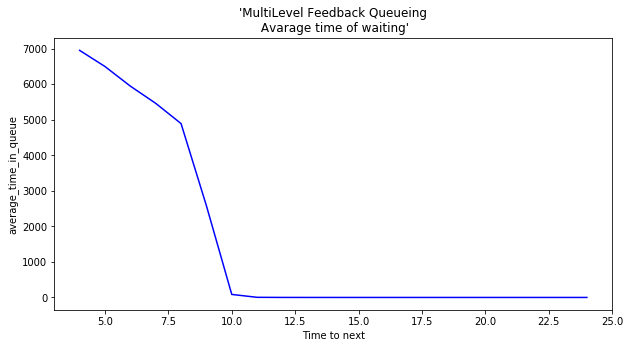

<Figure size 432x288 with 0 Axes>

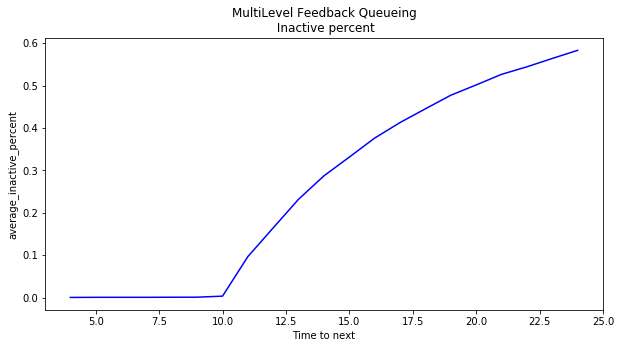

<Figure size 432x288 with 0 Axes>

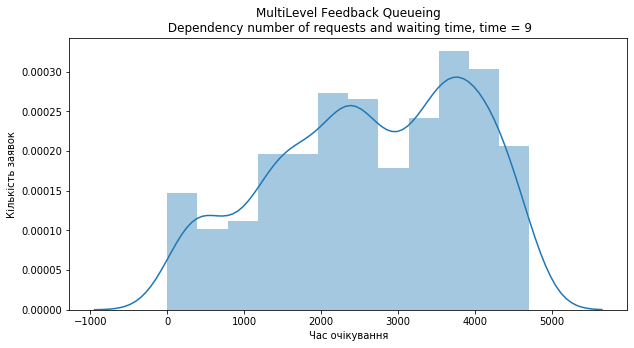

<Figure size 432x288 with 0 Axes>

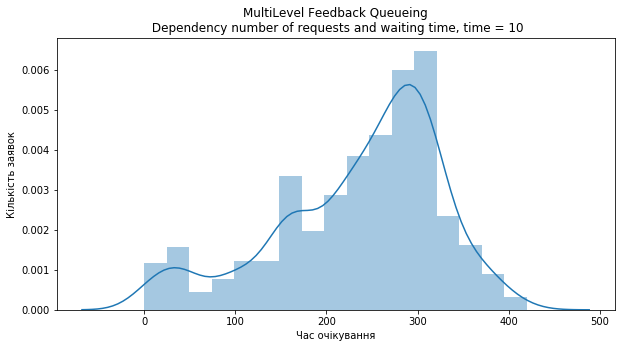

<Figure size 432x288 with 0 Axes>

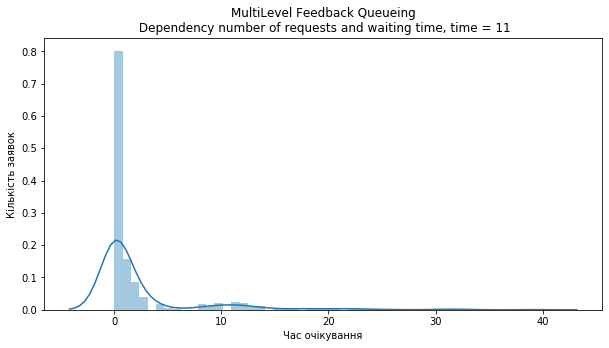

<Figure size 432x288 with 0 Axes>

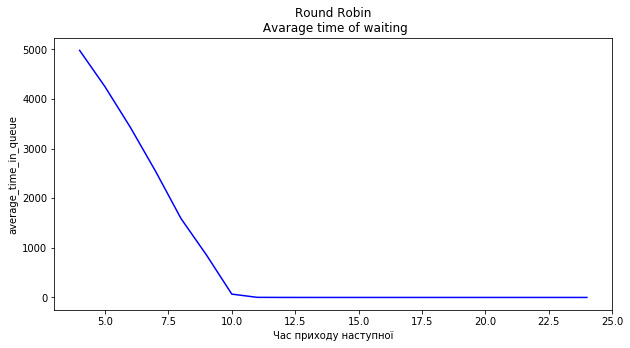

<Figure size 432x288 with 0 Axes>

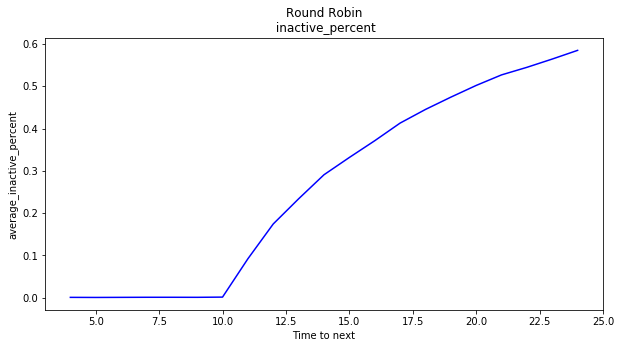

<Figure size 432x288 with 0 Axes>

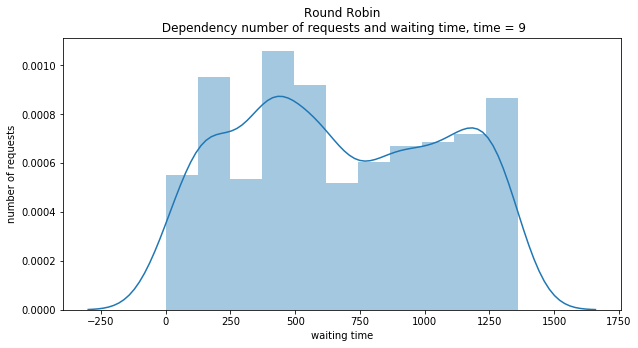

<Figure size 432x288 with 0 Axes>

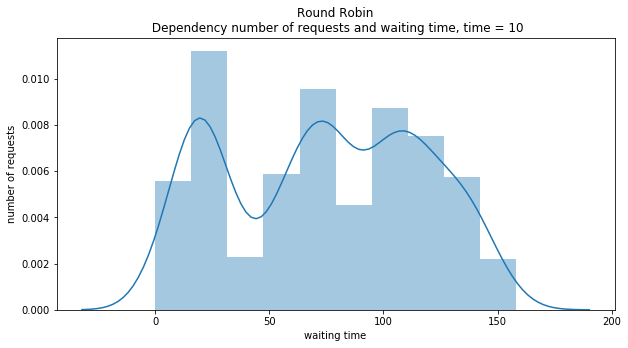

<Figure size 432x288 with 0 Axes>

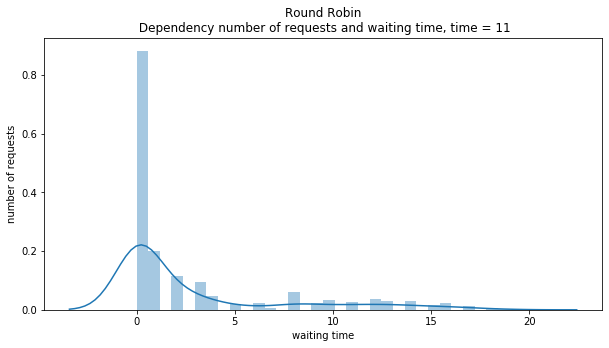

<Figure size 432x288 with 0 Axes>

In [4]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


class MultiLevelFeedBack(object):
    def __init__(self, min_interval=1, max_interval=10, number_tasks=10000, kvant1=8, kvant2=16):
        self.min_interval = min_interval
        self.max_interval = max_interval
        self.q1 = kvant1
        self.q2 = kvant2

        self.number_tasks = number_tasks

        self.empty_tasks = list()
        self.executed_tasks = list()

    def generate_tasks(self):
        # Time = 0
        # while len(self.empty_tasks) < self.number_tasks:
        #     Time += randint(self.min_interval, self.max_interval)
        #     task = Task(time_arrive=Time, time_process=10)
        #     self.empty_tasks.append(task)

        randomNums = np.random.normal(loc=self.max_interval, scale=2, size=self.number_tasks)
        randomInts = np.round(randomNums).astype(int)
        Time = 0
        for time in randomInts:
            if time <= 0:
                Time += self.max_interval
            else:
                Time += time
            task = Task(time_arrive=Time, time_process=10)
            self.empty_tasks.append(task)

    def modeling(self):
        if not self.empty_tasks:
            print('Generate tasks before modeling')
            return None

        processor = Processor()
        queue_0 = Queue()
        queue_1 = Queue()
        queue_2 = Queue()
        Time = 0

        while len(self.executed_tasks) < self.number_tasks:
            if not processor.is_free():
                if processor.task.time_process == processor.task.time_processed:
                    task = processor.task
                    task.time_exit = Time
                    self.executed_tasks.append(task)
                    processor.task = None

                elif processor.task.time_processed == self.q1:
                    task = processor.task
                    queue_1.add_element(task)
                    processor.task = None

                elif processor.task.time_processed == self.q1 + self.q2:
                    task = processor.task
                    queue_2.add_element(task)
                    processor.task = None

            if processor.is_free():
                if queue_0.is_exist():
                    processor.task = queue_0.get_element()
                    processor.task.time_start_process = Time

                elif queue_1.is_exist():
                    processor.task = queue_1.get_element()

                elif queue_2.is_exist():
                    processor.task = queue_2.get_element()

                else:
                    processor.task = None

            if len(self.empty_tasks) > 0 and self.empty_tasks[0].time_arrive == Time:
                task = self.empty_tasks.pop(0)
                if processor.is_free():
                    processor.task = task
                    processor.task.time_start_process = Time
                else:
                    queue_0.add_element(task)

            Time += 1
            if not processor.is_free():
                processor.task.time_processed += 1

        for task in self.executed_tasks:
            task.time_in_queue = task.time_exit - task.time_process - task.time_arrive

    def check_modeling(self):
        for task in self.executed_tasks:
            print('Time arrive: ', task.time_arrive)
            print('Start process: ', task.time_start_process)
            print('Processing time', task.time_process)
            print('Time of exit from system', task.time_exit)
            print('Time in queue', task.time_in_queue)
            print('-'*20)

    def get_average_time_in_queue(self):
        if not self.executed_tasks:
            print('In the first instance generate tasks and execute modeling')
            return None
        else:
            return sum([task.time_in_queue for task in self.executed_tasks]) / self.number_tasks

    def get_inaction_time_percent(self):
        if not self.executed_tasks:
            print('In the first instance generate tasks and execute modeling')
            return None
        else:
            return (self.executed_tasks[-1].time_exit - self.number_tasks*self.executed_tasks[0].time_process) / \
                   self.executed_tasks[-1].time_exit


class RoundRobin(object):
    def __init__(self, mean_interval=10, number_tasks=10000, kvant=8):
        self.mean_interval = mean_interval
        self.q = kvant
        self.number_tasks = number_tasks
        self.empty_tasks = list()
        self.executed_tasks = list()

    def generate_tasks(self):
        randomNums = np.random.normal(loc=self.mean_interval, scale=2, size=self.number_tasks)
        randomInts = np.round(randomNums).astype(int)
        Time = 0
        for time in randomInts:
            if time <= 0:
                Time += self.mean_interval
            else:
                Time += time
            task = Task(time_arrive=Time, time_process=10)
            self.empty_tasks.append(task)

    def modeling(self):
        if not self.empty_tasks:
            print('Generate tasks before modeling')
            return None

        processor = Processor()
        queue = Queue()
        Time = 0

        while len(self.executed_tasks) < self.number_tasks:
            if not processor.is_free():
                if processor.task.time_process == processor.task.time_processed:
                    task = processor.task
                    task.time_exit = Time
                    self.executed_tasks.append(task)
                    processor.task = None

                elif processor.task.time_processed == self.q:
                    task = processor.task
                    queue.add_element(task)
                    processor.task = None

            if processor.is_free():
                if queue.is_exist():
                    processor.task = queue.get_element()
                    if processor.task.time_processed == 0:
                        processor.task.time_start_process = Time
                else:
                    processor.task = None

            if len(self.empty_tasks) > 0 and self.empty_tasks[0].time_arrive == Time:
                task = self.empty_tasks.pop(0)
                if processor.is_free():
                    processor.task = task
                    processor.task.time_start_process = Time
                else:
                    queue.add_element(task)

            Time += 1
            if not processor.is_free():
                processor.task.time_processed += 1

        for task in self.executed_tasks:
            task.time_in_queue = task.time_exit - task.time_process - task.time_arrive

    def check_modeling(self):
        for task in self.executed_tasks:
            print('Time arrive: ', task.time_arrive)
            print('Start process: ', task.time_start_process)
            print('Processing time', task.time_process)
            print('Time of exit from system', task.time_exit)
            print('Time in queue', task.time_in_queue)
            print('-'*20)

    def get_average_time_in_queue(self):
        if not self.executed_tasks:
            print('In the first instance generate tasks and execute modeling')
            return None
        else:
            return sum([task.time_in_queue for task in self.executed_tasks]) / self.number_tasks

    def get_inaction_time_percent(self):
        if not self.executed_tasks:
            print('In the first instance generate tasks and execute modeling')
            return None
        else:
            return (self.executed_tasks[-1].time_exit - self.number_tasks*self.executed_tasks[0].time_process) / \
                   self.executed_tasks[-1].time_exit


def check_MultiLevel_SMO():
    intensities = list(range(4, 25))
    average_time_in_queue = list()
    average_inactive_percent = list()

    for intensity in intensities:
        smo = MultiLevelFeedBack(max_interval=intensity, number_tasks=1000)
        smo.generate_tasks()
        smo.modeling()
        average_time_in_queue.append(smo.get_average_time_in_queue())
        average_inactive_percent.append(smo.get_inaction_time_percent())
        
    data = [[intensities[i], average_time_in_queue[i]] for i in range(len(intensities))]
    fig= plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x="intensities", y="average_time_in_queue",
                     data=pd.DataFrame(columns=['intensities', 'average_time_in_queue'], 
                                       data=data), 
                     color = 'blue').set_title("'MultiLevel Feedback Queueing\n Avarage time of waiting'")
    plt.xlabel('Time to next')
    plt.show()
    plt.savefig('Avarage_time_of_waiting_1.png')
    
    data = [[intensities[i], average_inactive_percent[i]] for i in range(len(intensities))]
    fig= plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x="intensities", y="average_inactive_percent",
                     data=pd.DataFrame(columns=['intensities', 'average_inactive_percent'], 
                                       data=data), 
                     color = 'blue').set_title("MultiLevel Feedback Queueing\n Inactive percent")
    plt.xlabel('Time to next')
    plt.show()
    plt.savefig('Inactive_percent_2.png')


    for time in [9, 10, 11]:
        smo = MultiLevelFeedBack(max_interval=time, number_tasks=1000)
        smo.generate_tasks()
        smo.modeling()
        array = [task.time_in_queue for task in smo.executed_tasks]
        
        fig= plt.figure(figsize=(10, 5))
        ax = sns.distplot(array)
        plt.title("MultiLevel Feedback Queueing\n Dependency number of requests and waiting time, time = {}".format(time))
        plt.xlabel("Час очікування")
        plt.ylabel("Кількість заявок")
        plt.show()
        plt.savefig(f'я{time}.png')


def check_RR_SMO():
    intensities = list(range(4, 25))
    average_time_in_queue = list()
    average_inactive_percent = list()

    for intensity in intensities:
        smo = RoundRobin(mean_interval=intensity, number_tasks=1000)
        smo.generate_tasks()
        smo.modeling()
        average_time_in_queue.append(smo.get_average_time_in_queue())
        average_inactive_percent.append(smo.get_inaction_time_percent())
        
    data = [[intensities[i], average_time_in_queue[i]] for i in range(len(intensities))]
    fig= plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x="intensities", y="average_time_in_queue",
                     data=pd.DataFrame(columns=['intensities', 'average_time_in_queue'], 
                                       data=data), 
                     color = 'blue').set_title("Round Robin\n Avarage time of waiting")
    plt.xlabel('Час приходу наступної')
    plt.show()
    plt.savefig('check_RR_SMO_Avarage_time_of_waiting_3.png')

    
    
    
    data = [[intensities[i], average_inactive_percent[i]] for i in range(len(intensities))]
    fig= plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x="intensities", y="average_inactive_percent",
                     data=pd.DataFrame(columns=['intensities', 'average_inactive_percent'], 
                                       data=data), 
                     color = 'blue').set_title("Round Robin\n inactive_percent")
    plt.xlabel('Time to next')
    plt.show()
    plt.savefig('check_RR_SMO_inactive_percent_4.png')


    for time in [9, 10, 11]:
        smo = RoundRobin(mean_interval=time, number_tasks=1000)
        smo.generate_tasks()
        smo.modeling()
        array = [task.time_in_queue for task in smo.executed_tasks]
        
        fig= plt.figure(figsize=(10, 5))
        ax = sns.distplot(array)
        plt.title("Round Robin\n Dependency number of requests and waiting time, time = {}".format(time))
        plt.xlabel("waiting time")
        plt.ylabel("number of requests")
        plt.show()
        plt.savefig(f'Dependency_number_of_requests_and_waiting_time._time={time}.png')



def main():
    check_MultiLevel_SMO()
    check_RR_SMO()


if __name__ == '__main__':
    main()

